
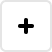
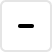
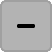
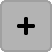
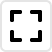
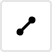
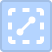
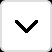
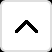
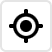

In [1]:
from lets_plot import *
from lets_plot.mapping import *

LetsPlot.setup_html() 

In [2]:
blank_theme = theme(line=element_blank(), axis_text=element_blank(), axis_title=element_blank(),
                    legend_position='none')

In [3]:
import pandas as pd

mpg_df = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg_df.head()

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

In [4]:
p = ggplot(mpg_df) + blank_theme + scale_fill_brewer(palette='Dark2')

In [5]:
p + geom_pie(aes(fill='class'), size=22, hole=0.2,
             labels=layer_labels()
                         .line('@class')
                         .line('(@{..prop..})')
                         .format('@{..prop..}', '.0%'),
             tooltips='none')

In [6]:
p + geom_pie(aes(fill=as_discrete('class', order_by='..count..')), size=20, hole=0.2,
             labels=layer_labels()
                         .line('@class')
                         .line('(@{..prop..})')
                         .format('@{..prop..}', '.0%'),
             tooltips='none')

In [7]:
# Change default annotation's size

p + geom_pie(aes(fill=as_discrete('class', order_by='..count..')), size=20, hole=0.2,
             labels=layer_labels()
                         .line('@..proppct.. %')
                         .format('@{..proppct..}', '.1f')
                         .size(18),
             tooltips='none')

In [8]:
# theme(text) is applying to the annotation's text

ggplot(mpg_df) + blank_theme + \
    geom_pie(aes(fill=as_discrete('class', order_by='..count..', order=1)), size=20, hole=0.3,
             labels=layer_labels()
                         .line('@..proppct.. %')
                         .format('@{..proppct..}', '.1f'),
             tooltips='none') + \
    theme(text=element_text(face='bold italic', size=16, color='#542788'), legend_position='right')

In [9]:
# Use colors of the flavor scheme

p + geom_pie(aes(fill=as_discrete('class', order_by='..count..')), size=20, hole=0.2,
             labels=layer_labels()
                         .line('@..proppct.. %')
                         .format('@{..proppct..}', '.1f')
                         .size(18),
             tooltips='none') + \
    flavor_darcula() 

In [10]:
length = {
  'name' : ['20-50 km', '50-75 km', '10-20 km', '75-100 km', '3-5 km', '7-10 km', '5-7 km', '>100 km', '2-3 km'],
  'count': [1109, 696, 353, 192, 168, 86, 74, 65, 53],
  'explode': [0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6]
}

ggplot(length) + \
    geom_pie(aes(fill='name', slice='count', explode='explode'), stat='identity',
             stroke=1, stroke_color='black', size=20, hole=0.3,
             labels=layer_labels(['name', 'count'])) + \
    scale_fill_gradient(low='dark_blue', high='light_green') + \
    blank_theme

In [11]:
ggplot(length) + \
    geom_pie(aes(fill=as_discrete('name', order_by='..count..', order=1), weight='count'), 
             stroke=1, stroke_color='black', size=22, 
             labels=layer_labels(['name', '..count..'])) +\
    scale_fill_gradient(low='light_green', high='dark_blue') +\
    blank_theme

In [12]:
(ggplot(
  {
    'x': [1, 1, 1, 1, 1, 1.5, 1.5,   2,   2,   2 ],
    'y': [1, 1, 1, 1, 1,   2,   2, 1.5, 1.5, 1.5],
    's': [3, 1, 2, 1, 4,   1,   3,   3,   2,  1]
  }
) + xlim(0.5,2.5) + ylim(0.5,2.5) \
  + geom_pie(aes('x', 'y', slice='s', fill=as_discrete('s')),
             size=10, stat='identity',
             labels=layer_labels(['s']).size(16),
             tooltips='none'))

In [13]:
ggplot({'n': ["a", "b", "c"], 's': [1, 2, 3]}) + blank_theme + \
    geom_pie(aes(fill='n', slice='s', size='n'), stat="identity",
             labels=layer_labels().line('^fill (^slice)')) + \
    theme(legend_position='right')